In [1]:
#Stefan Bukarica - 190563930
#Zachary Wolfe Herman - 190693220
#Jamie Schlosser - 190357980


%matplotlib inline

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rd

# NBER recessions
from pandas_datareader.data import DataReader


In [2]:
#pick a stock for the regime model based on user input of ticker and years to grab
#calculate intraday, overnight, and daily returns
def grabstock(symbol, years):
    end_date = dt.today().strftime('%Y-%m-%d')
    start_date = (dt.today() - td(days=years*365)).strftime('%Y-%m-%d')
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start_date, end=end_date)
    df['Intradayreturn'] = df.Close/df.Open-1
    overnightreturns = []
    df['overnight_return'] = (df.Open-df.Close)/df.Close
    df['daily_return'] = df['overnight_return'] + df['Intradayreturn']
    df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
    df = df.dropna()
    #df['log_returns'] = log_returns
    return df

#determines the start regime of the simulation
#returns the regime, mean of the log returns and volatility of log returns
#mean and sigma are used in the GBM as parameters
def start_regime(symbol):
    ticker = yf.Ticker(symbol)
    end_date = dt.today().strftime('%Y-%m-%d')
    start_date = (dt.today() - td(days=365)).strftime('%Y-%m-%d')
    df = ticker.history(start = start_date, end = end_date)
    df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
    df = df.dropna()
    log_returns = df['log_return']
    mean = np.mean(log_returns)
    std = np.std(log_returns)
    mod_stock = sm.tsa.MarkovRegression(log_returns, k_regimes=2, switching_variance= True)
    res_stock = mod_stock.fit()
    params = res_stock.params
    if params[0] > params[1]:
        return 'bull', mean, std
    else:
        return 'bear', mean, std


start_regime('PEP')
stock = grabstock('^GSPC', 4)
#regim = regime('AAPL')
stock

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return,log_return
Date,,,,,,,,,,,
2019-12-20 00:00:00-05:00,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,0.0,0.0,-0.000655,0.000655,4.288288e-07,0.004933
2019-12-23 00:00:00-05:00,3226.050049,3227.780029,3222.300049,3224.010010,3064530000,0.0,0.0,-0.000632,0.000633,4.001377e-07,0.000866
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0,-0.000642,0.000642,4.121616e-07,-0.000195
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0,0.003938,-0.003923,1.545004e-05,0.005115
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0,-0.002220,0.002225,4.940889e-06,0.000034
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,4593.390137,4623.709961,4593.390137,4622.439941,3823210000,0.0,0.0,0.006324,-0.006285,3.974494e-05,0.003917
2023-12-12 00:00:00-05:00,4618.299805,4643.930176,4608.089844,4643.700195,3808380000,0.0,0.0,0.005500,-0.005470,3.008392e-05,0.004589
2023-12-13 00:00:00-05:00,4646.200195,4709.689941,4643.229980,4707.089844,5063650000,0.0,0.0,0.013105,-0.012936,1.695261e-04,0.013558


In [3]:
dta = stock
dta

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return,log_return
Date,,,,,,,,,,,
2019-12-20 00:00:00-05:00,3223.330078,3225.649902,3216.030029,3221.219971,6457480000,0.0,0.0,-0.000655,0.000655,4.288288e-07,0.004933
2019-12-23 00:00:00-05:00,3226.050049,3227.780029,3222.300049,3224.010010,3064530000,0.0,0.0,-0.000632,0.000633,4.001377e-07,0.000866
2019-12-24 00:00:00-05:00,3225.449951,3226.429932,3220.510010,3223.379883,1296530000,0.0,0.0,-0.000642,0.000642,4.121616e-07,-0.000195
2019-12-26 00:00:00-05:00,3227.199951,3240.080078,3227.199951,3239.909912,2164540000,0.0,0.0,0.003938,-0.003923,1.545004e-05,0.005115
2019-12-27 00:00:00-05:00,3247.229980,3247.929932,3234.370117,3240.020020,2429150000,0.0,0.0,-0.002220,0.002225,4.940889e-06,0.000034
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,4593.390137,4623.709961,4593.390137,4622.439941,3823210000,0.0,0.0,0.006324,-0.006285,3.974494e-05,0.003917
2023-12-12 00:00:00-05:00,4618.299805,4643.930176,4608.089844,4643.700195,3808380000,0.0,0.0,0.005500,-0.005470,3.008392e-05,0.004589
2023-12-13 00:00:00-05:00,4646.200195,4709.689941,4643.229980,4707.089844,5063650000,0.0,0.0,0.013105,-0.012936,1.695261e-04,0.013558


c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


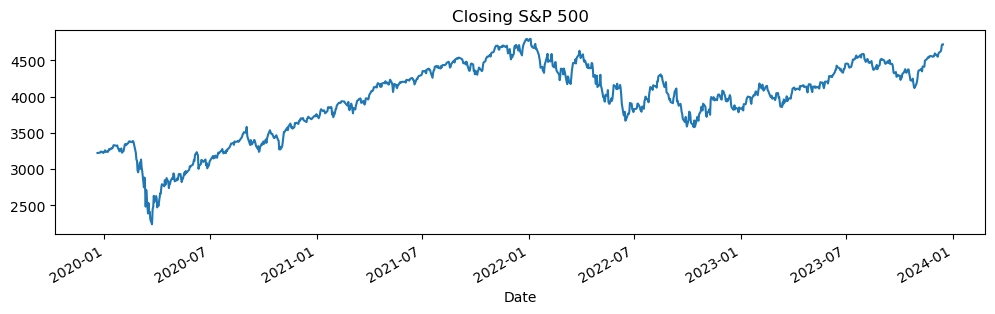

In [4]:
# Test example using S&P 500
ret = dta.Close
ret.plot(title="Closing S&P 500", figsize=(12, 3))

# Fit the model
mod_hamilton = sm.tsa.MarkovRegression(ret, k_regimes=2)
res_hamilton = mod_hamilton.fit()

In [5]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1004
Model:               MarkovRegression   Log Likelihood               -7114.609
Date:                Mon, 18 Dec 2023   AIC                          14239.218
Time:                        20:32:18   BIC                          14263.777
Sample:                             0   HQIC                         14248.550
                               - 1004                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3250.3303     18.916    171.830      0.000    3213.256    3287.405
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.7445     11.094    380.990      0.000    4205.000    4248.489
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.127e+04   3635.562     22.355      0.000    7.41e+04    8.84e+04
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9952      0.004    258.171      0.000       0.988       1.003
p[1->0]        0.0023      0.002      1.365      0.172      -0.001       0.006
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

# What we can Understand from the above:

We are given two constants, in Regime Switching model regarding stock price, <br>
the most basic example is a bull regime and a bear regime:<br>

Regime 0 corresponds to the 'low' regime according to statsmodel.api references which is our bear scenario, <br>
while Regime 1 corresponds to the 'high' regime which is our bull scenario

With a mean of approx. $3243 for the market value of the S and P 500, we can assume that this is the mean of a bear market<br>
on the contrary with a mean of approx. $4218 we can say this is the mean of a bull market<br>


<Axes: title={'center': 'Probability of being in the Bull regime S&P 500'}, xlabel='Date'>

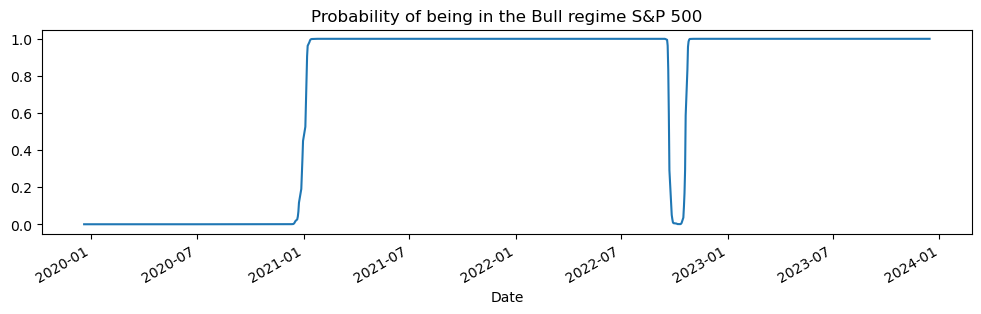

In [6]:
#plot of the probability of being ina bull regime
res_hamilton.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the Bull regime S&P 500", figsize=(12, 3)
)

### We can see that the bull periods matches what we know as the markets bull periods 

In [7]:
res_hamilton.expected_durations

array([209.98428995, 432.20470402])

##### The expected durations above returns how long we are in a bear market and bull market, respectively

We obtain this by dividing each by the number of days in a month resulting in : <br>
Approx 2 Years Bear<br>
Approx 2 Years Bull

### Changes using 3 regimes: 

Bear, Stagnant, Bull<br>


Notes:<br>
Poor visualization for market, <br>
ie market is rarely stagnant, so 3 regimes is a poor visualization

In [8]:
ret2 = dta.Close
#exog = pd.concat((dta.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]
# Fit the model
mod_3 = sm.tsa.MarkovRegression(ret2, k_regimes=3)
res_3 = mod_3.fit(search_reps=20)
#print(res_3.summary())
#print(res_3.expected_durations)

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'


In [9]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1004
Model:               MarkovRegression   Log Likelihood               -7114.609
Date:                Mon, 18 Dec 2023   AIC                          14249.218
Time:                        20:32:30   BIC                          14298.336
Sample:                             0   HQIC                         14267.883
                               - 1004                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3212.2893      0.109   2.96e+04      0.000    3212.077    3212.502
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3250.3930     18.914    171.847      0.000    3213.321    3287.465
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4226.7054     11.094    381.002      0.000    4204.962    4248.449
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.128e+04      0.001   8.51e+07      0.000    8.13e+04    8.13e+04
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0002     64.341   3.57e-06      1.000    -126.106     126.107
p[1->0]             0        nan        nan        nan         nan         nan
p[2->0]     8.006e-11   2.61e-05   3.07e-06      1.000   -5.12e-05    5.12e-05
p[0->1]        0.9998     48.804      0.020      0.984     -94.655      96.655
p[1->1]        0.9952      0.004    258.347      0.000       0.988       1.003
p[2->1]        0.0023      0.002      1.365      0.172      -0.001       0.006
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 3.69e+24. Standard errors may be unstable.
"""

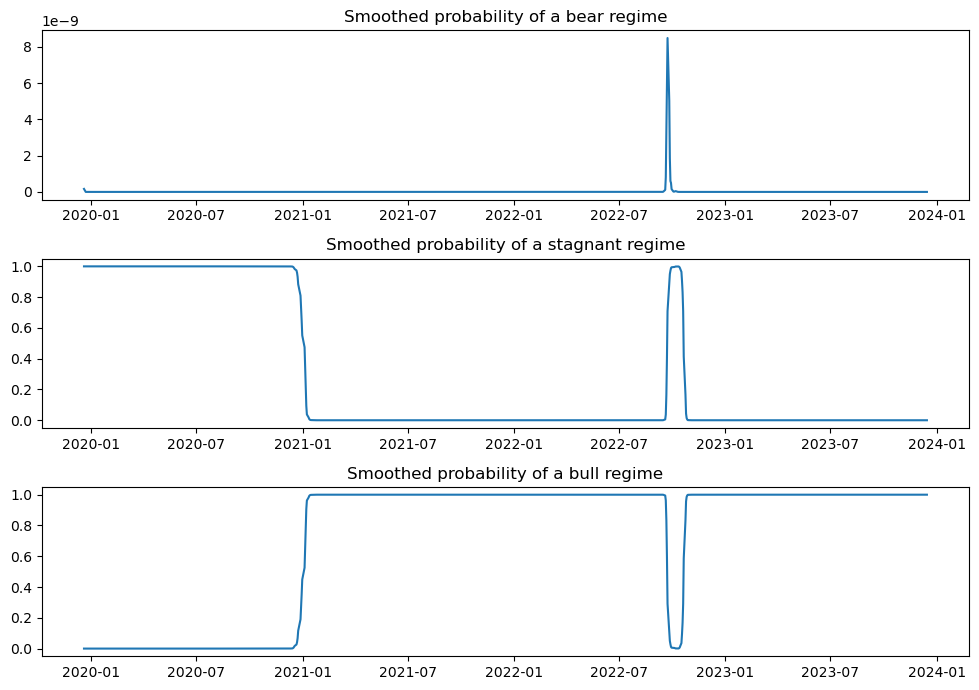

In [10]:
#plots to see the effects of using 3 regimes as opposed to 2 regimes
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_3.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a bear regime")

ax = axes[1]
ax.plot(res_3.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a stagnant regime")

ax = axes[2]
ax.plot(res_3.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a bull regime")

fig.tight_layout()

## Further steps: comparison to the other stocks vs market:

PEP, AAPL, GME <br>
We want to look at some cyclical stocks

### Simulating stock values using calculated transition probabilities and mean and volatility of each regime

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean of Final Stock Price: 144.0981061857399
Sigma of Final Stock Price: 39.86437021350966


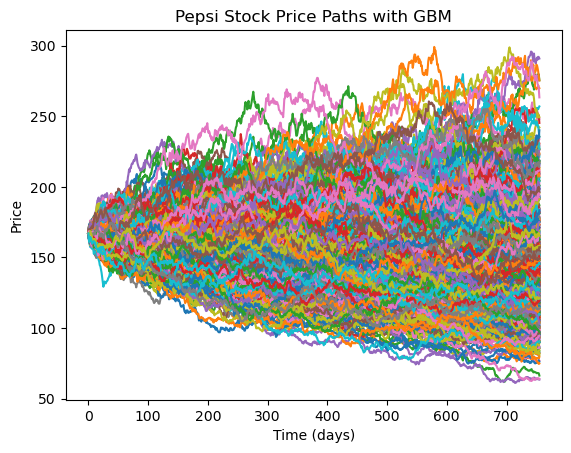

In [11]:
#returns a simulated and N x time steps array of stock price paths for a GBM simulation
def gbm_stock_price(S0, mu, sigma, T, N, W):
    dt = T / N
    t = np.linspace(0, T, N+1)
    #W = np.random.standard_normal(size=N+1) 
    #print(W)
    W = np.cumsum(W)* np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W  # GBM process
    S = S0 * np.exp(X)  # Stock price process
    S[0] = S0
    return S

num_sims = 500
T = 3 #years
num_days = T*252
W = np.zeros((num_sims, num_days))
sim_gbm = np.zeros((num_sims, num_days))
stock = grabstock('PEP', T)
initial_price = stock['Close'].iloc[-1]
#print(stock.iloc[-1])
#print(initial_price)
mu = start_regime('PEP')[1]
sigma = start_regime('PEP')[2]
final_price = np.zeros(num_sims)
for i in range(num_sims):
    W[i] = np.random.standard_normal(size=num_days)
    sim_gbm[i] = gbm_stock_price(initial_price, mu*252, sigma*np.sqrt(252), T, num_days-1, W[i])
    final_price[i] = (sim_gbm[i][num_days-1])
mean_final_price = np.mean(final_price)
std_final_price = np.std(final_price)
print("Mean of Final Stock Price:", mean_final_price)
print("Sigma of Final Stock Price:", std_final_price)

#print(sim_gbm)

for i in range(num_sims):
    plt.plot(sim_gbm[i])


plt.title("Pepsi Stock Price Paths with GBM")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.show()




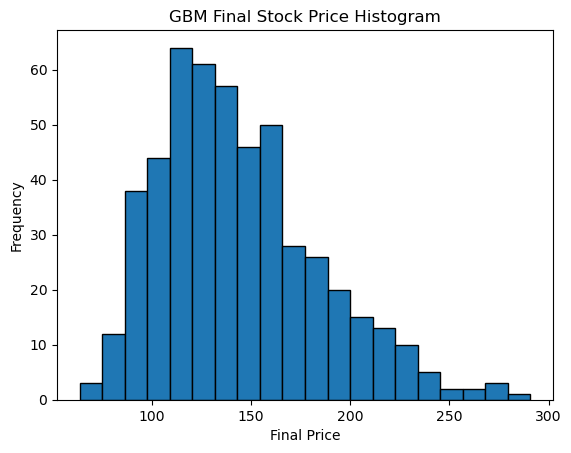

In [12]:
plt.hist(final_price, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('GBM Final Stock Price Histogram')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


167.0


c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p[0->0]      0.961285
p[1->0]      0.223320
const[0]     0.000701
const[1]    -0.002162
sigma2[0]    0.000072
sigma2[1]    0.000315
dtype: float64


C:\Users\stefa\AppData\Local\Temp\ipykernel_46932\3067983125.py:42: RuntimeWarning: invalid value encountered in sqrt
  sim_regime = regime_stock_price(initial_price, params[2], np.sqrt(params[3]), params[4], np.sqrt(params[5]), T, num_days, W, current_regime, params[0], 1-params[1], num_sims)


Mean of Final Stock Price: 194.92891526795472
Sigma of Final Stock Price: 104.83678869220502


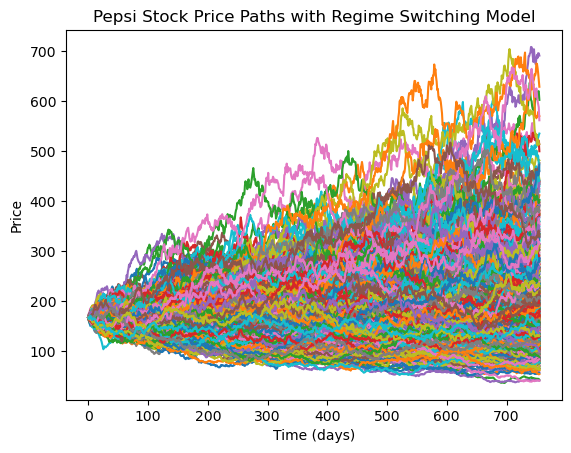

In [13]:
W1 = np.zeros((num_sims, num_days))
S1 = np.zeros((num_sims,num_days))
X1 = np.zeros((num_sims,num_days))
#returns a stock price a Nxtime step two dimensional array of N simulated stock price paths using MSDR parameters for regime switching
def regime_stock_price(S0, mu_bull, vol_bull, mu_bear, vol_bear, T, N, W, current_regime, p_bull_to_bear, p_bear_to_bear, num_sims):
    for i in range(num_sims):
        #t = np.linspace(0, T, N+1)
        S1[i][0] = S0
        for j in range(1,N):
            if current_regime == 'bull':
                dt = T / N
                #W1[i][j] = mu_bull + vol_bull*W[i][j]
                #W1[i][j] = W1[i][j] * np.sqrt(dt)  # Brownian motion
                X1[i][j] = (mu_bull - 0.5 * vol_bull**2) *dt + vol_bull * W[i][j]  # GBM process
                S1[i][j] = S1[i][j-1] * np.exp(X1[i][j])  # Stock price process
                if np.random.rand() > p_bull_to_bear: #coin flip: we see if switching criteria is met
                    current_state = "bear"
            else:
                dt = T / N
                #W1[i][j] = mu_bear + vol_bear*W[i][j]
                #W1[i][j] = W1[i][j] * np.sqrt(dt)  # Brownian motion
                X1[i][j] = (mu_bear - 0.5 * vol_bear**2) *dt + vol_bear * W[i][j]  # GBM process
                S1[i][j] = S1[i][j-1]* np.exp(X1[i][j])  # Stock price process
                if np.random.rand() > p_bear_to_bear:  #coin flip: we see if switching criteria is met
                    current_state = "bull"
    
    return S1
            
    

stock = grabstock('PEP', T)
num_days = T*252
stock_logret = stock.log_return
mod_stock = sm.tsa.MarkovRegression(stock_logret, k_regimes=2, switching_variance= True)
res_stock = mod_stock.fit()
initial_price = stock['Close'].iloc[-1]
print(initial_price)
params = res_stock.params
current_regime = start_regime('PEP')[0]
print(params)


sim_regime = regime_stock_price(initial_price, params[2], np.sqrt(params[3]), params[4], np.sqrt(params[5]), T, num_days, W, current_regime, params[0], 1-params[1], num_sims)

for i in range(num_sims):
    final_price[i] = (sim_regime[i][num_days-1])
mean_final_price = np.mean(final_price)
std_final_price = np.std(final_price)
print("Mean of Final Stock Price:", mean_final_price)
print("Sigma of Final Stock Price:", std_final_price)

for i in range(num_sims):
    plt.plot(sim_regime[i])
plt.title("Pepsi Stock Price Paths with Regime Switching Model")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.show()



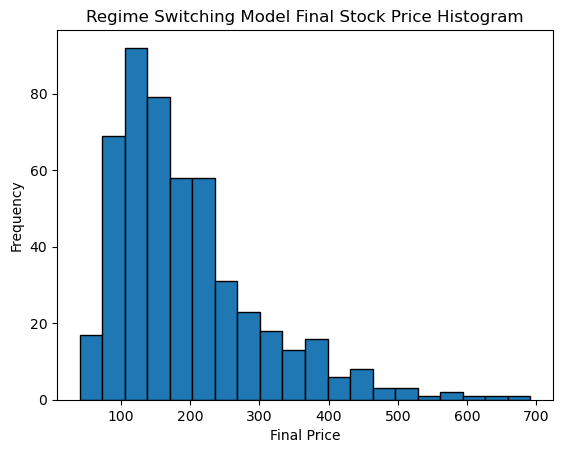

In [15]:
plt.hist(final_price, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Regime Switching Model Final Stock Price Histogram')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

## The links for statsmodels.api:
https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html

https://www.statsmodels.org/stable/examples/notebooks/generated/markov_autoregression.html